### Sales Performance of Video Games

In [44]:
import numpy as np
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For standardizing data
from sklearn.cluster import AgglomerativeClustering      # For clustering
from scipy.cluster.hierarchy import dendrogram, linkage  # For clustering and visualization

In [2]:
# import csv dataset
data = pd.read_csv('Video_Games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
# check shape of dataframe
data.shape

(16719, 16)

In [5]:
# check for null in the dataset
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#### Clean Dataset

In [6]:
# function to clean dataset

def cleaning_fxn(data):
    # numeric columns
    
    data['Critic_Count'].fillna(data['Critic_Count'].mean(), inplace=True)
    data['Critic_Score'].fillna(data['Critic_Score'].mean(), inplace=True)
    data['User_Count'].fillna(data['User_Count'].mean(), inplace=True)
    
    # replace tbd in userscore with nan
    data['User_Score'].replace('tbd', np.nan, inplace = True)
    data['User_Score'] = data['User_Score'].astype(float)
    data['User_Score'].fillna(data['User_Score'].mean(), inplace=True)
    
    # categorical columns
    data['Developer'].fillna(data['Developer'].mode()[0], inplace=True)
    data['Rating'].fillna(data['Rating'].mode()[0], inplace=True)
    mode_rating = data['Rating'].mode()[0]
    data['Rating'].replace(['EC', 'K-A', 'AO', 'RP'], [mode_rating, mode_rating, mode_rating, mode_rating], inplace=True)
    
    
    # reduce the class of platform to 10
    top9 = data['Platform'].value_counts().index[:9]
    data['Platform'] = np.where(data['Platform'].isin(top9), data['Platform'], 'Others')
    
    # drop rows of other columns with nan
    data.dropna(inplace = True) 

In [7]:
# call function to clean dataset
cleaning_fxn(data)

In [8]:
data.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [9]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.981993,26.399803,7.125889,162.583932
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,9.705303,13.254899,1.010457,380.168615
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.967679,22.000000,7.125046,30.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.967679,26.360821,7.125046,162.229908
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.360821,7.300000,162.229908
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


#### Exploratory Data Anlysis

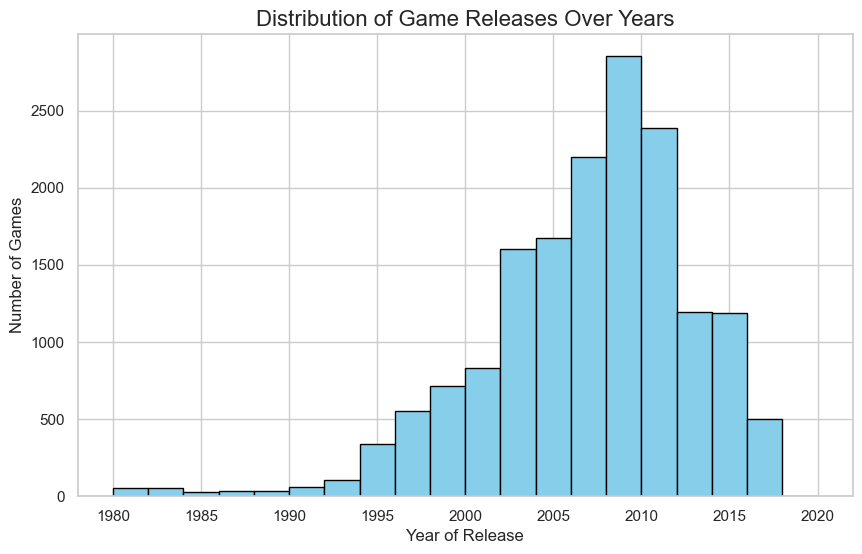

In [10]:
# VIDEO GAMES DISTRIBUTION BY YEAR

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot a histogram for the 'Year_of_Release' column
plt.hist(data['Year_of_Release'], bins=20, color='skyblue', edgecolor='black')

# Add title and axis labels
plt.title('Distribution of Game Releases Over Years', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)

# Display the plot
plt.show()


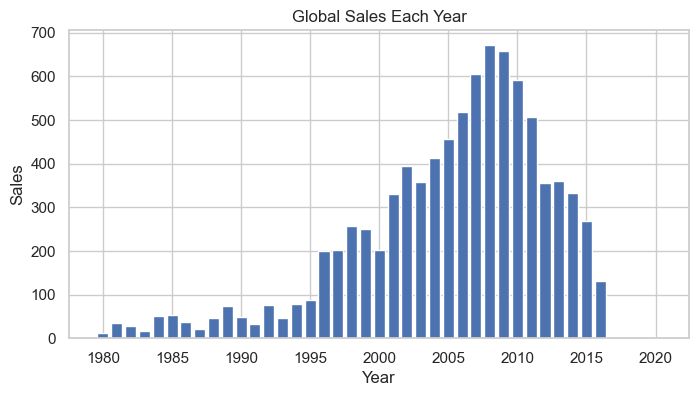

In [11]:
# Summing global sales for each year
sales_by_year = data.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

# Plotting the bar chart for global sales each year
plt.figure(figsize=(8, 4))
plt.bar(sales_by_year['Year_of_Release'], sales_by_year['Global_Sales'])
plt.title('Global Sales Each Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

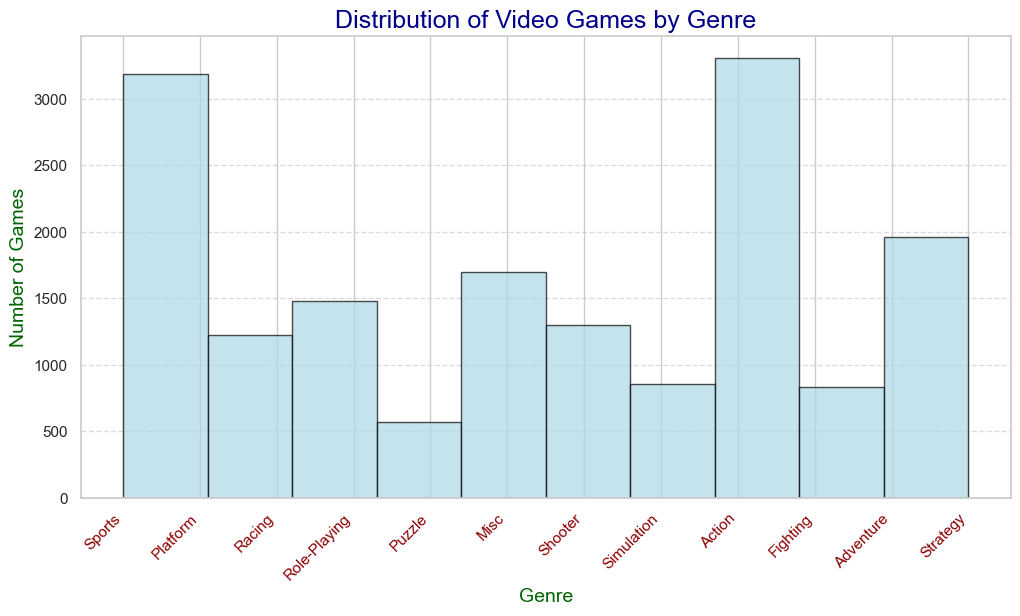

In [12]:
# video games distribution by genre
# Set a seaborn color palette for better aesthetics
sns.set_palette("husl")

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Plot a bar chart for the distribution of games by genre
plt.hist(data['Genre'], color='lightblue', edgecolor='black', alpha=0.7)

# Add title and axis labels
plt.title('Distribution of Video Games by Genre', fontsize=18, color='darkblue')
plt.xlabel('Genre', fontsize=14, color='darkgreen')
plt.ylabel('Number of Games', fontsize=14, color='darkgreen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', color='darkred')

# Add grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_26488\3405535395.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


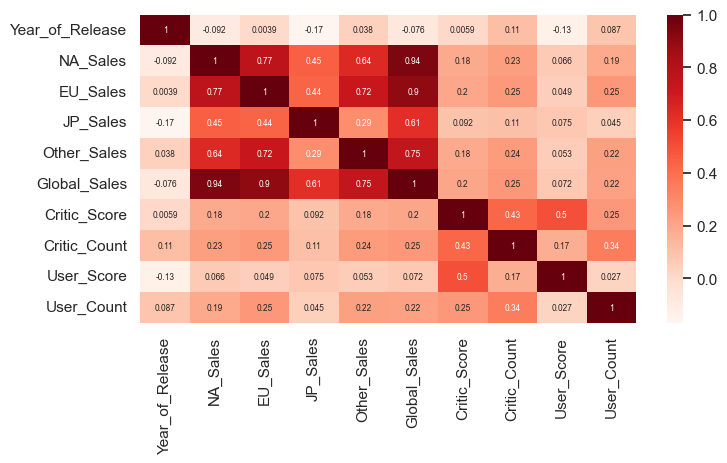

In [13]:
# correlation of varibales in dataset
correlation = data.corr()
plt.figure(figsize=(8, 4)) 
sns.heatmap(correlation, annot = True, annot_kws={"size": 6}, cmap = 'Reds')
plt.show()

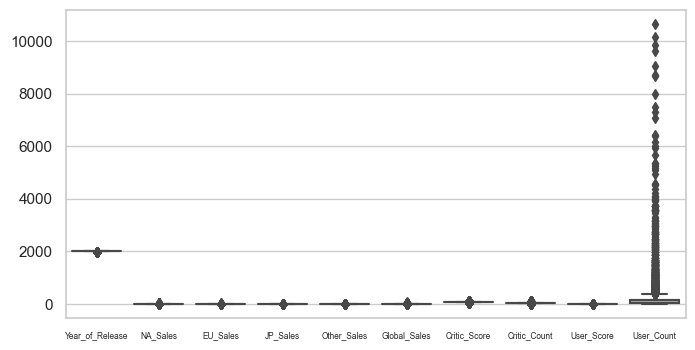

In [14]:
# check for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data)
plt.xticks(fontsize=6)
plt.show()

#### Outlier Treatment

In [15]:
num_data = data.select_dtypes(include=float).columns

ex_cols = ['Year_of_Release']

for col in num_data:
    if col not in ex_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        Lower_boundary = Q1 - (1.5 * (Q3 - Q1))
        Upper_boundary = Q3 + (1.5 * (Q3 - Q1))
        data[col] = np.clip(data[col], Lower_boundary, Upper_boundary)

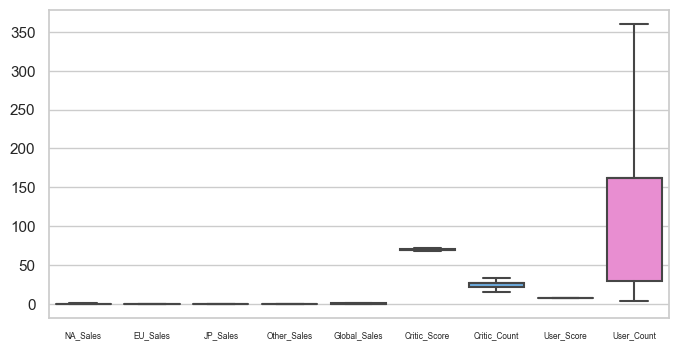

In [16]:
col_to_incl = [col for col in data.columns if col not in ex_cols]

# Boxplot for selected columns
plt.figure(figsize=(8, 4))
sns.boxplot(data=data[col_to_incl])
plt.xticks(fontsize=6)
plt.show()

In [17]:
# drop columns ather are irrelevant features
data_feat = data.drop(['Name', 'Publisher', 'Developer'], axis = 1)
data_feat.head(3)

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,0.6,0.275,0.1,0.075,1.085,71.548482,32.902052,7.562431,322.000000,E
1,Others,1985.0,Platform,0.6,0.275,0.1,0.075,1.085,68.967679,26.360821,7.125046,162.229908,E
2,Wii,2008.0,Racing,0.6,0.275,0.1,0.075,1.085,71.548482,32.902052,7.562431,360.574769,E


In [18]:
# encode categorical columns
cols_to_encode = ['Platform', 'Genre', 'Rating']

for col in cols_to_encode:
    label_encoder = LabelEncoder()
    data_feat[col] = label_encoder.fit_transform(data_feat[col])

data_feat.head(5)

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,7,2006.0,10,0.6,0.275,0.1,0.075,1.085,71.548482,32.902052,7.562431,322.000000,0
1,1,1985.0,4,0.6,0.275,0.1,0.075,1.085,68.967679,26.360821,7.125046,162.229908,0
2,7,2008.0,6,0.6,0.275,0.1,0.075,1.085,71.548482,32.902052,7.562431,360.574769,0
3,7,2009.0,10,0.6,0.275,0.1,0.075,1.085,71.548482,32.902052,7.562431,192.000000,0
4,1,1996.0,7,0.6,0.275,0.1,0.075,1.085,68.967679,26.360821,7.125046,162.229908,0


In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score

##### Using Rating - KMeans

In [20]:
X_rating = data_feat[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
y_rating = data_feat.Rating

In [21]:
scale = StandardScaler()
X_scaled_rating = scale.fit_transform(X_rating) 

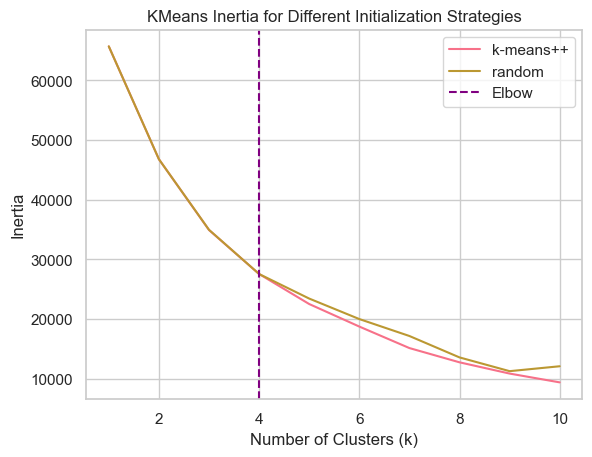

In [22]:
# Comparing init for 'k-means++' and'random' in the KMeans algorithm
from kneed import KneeLocator

inertia_kmeans_plusplus = []
inertia_random = []

for k in range(1, 11):
    kmeans_plusplus = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans_random = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)

    kmeans_plusplus.fit(X_scaled_rating)
    kmeans_random.fit(X_scaled_rating)

    inertia_kmeans_plusplus.append(kmeans_plusplus.inertia_)
    inertia_random.append(kmeans_random.inertia_)
    
# Using KneeLocator to find the elbow point
k1 = KneeLocator(range(1, 11), inertia_kmeans_plusplus, curve='convex', direction='decreasing')

# Plotting the results
plt.plot(range(1, 11), inertia_kmeans_plusplus, label='k-means++')
plt.plot(range(1, 11), inertia_random, label='random')
plt.axvline(x=k1.elbow, color='purple', label='Elbow', ls='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans Inertia for Different Initialization Strategies')
plt.legend()
plt.show()


In [23]:
def clustering(X, n_clus):
    kmeans = KMeans(n_clusters=n_clus, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    return labels

In [24]:
rating_labels = clustering(X_scaled_rating, 4)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
np.unique(rating_labels)

array([0, 1, 2, 3])

In [26]:
class plotGrid:
    def __init__(self, data, feat, labels):     
        self.data = data[feat]
        self.num_feat = len(feat)
        self.rows = self.num_feat
        self.cols = self.num_feat
        self.labels = labels

    def scatterplot(self):
        fig, axes = plt.subplots(self.rows, self.cols, figsize=(15, 15))

        for i, col1 in enumerate(self.data.columns):
            for j, col2 in enumerate(self.data.columns):
                ax = axes[i, j]

                if i == j:
                    sns.histplot(data=self.data, x=self.data[col1], bins=20, ax=ax, kde=True, hue=self.labels, palette='viridis', legend=False)
                else:
                    sns.scatterplot(data=self.data, x=self.data[col1], y=self.data[col2], ax=ax, hue=self.labels, palette='viridis')

                ax.set_xlabel(col1)
                ax.set_ylabel(col2)

                if i == self.rows - 1:
                    ax.set_xlabel(col2)
                if j == 0:
                    ax.set_ylabel(col1)

        plt.tight_layout()
        plt.show()

In [27]:
plot_rating = plotGrid(data=data_feat, feat=X_rating.columns, labels=rating_labels)

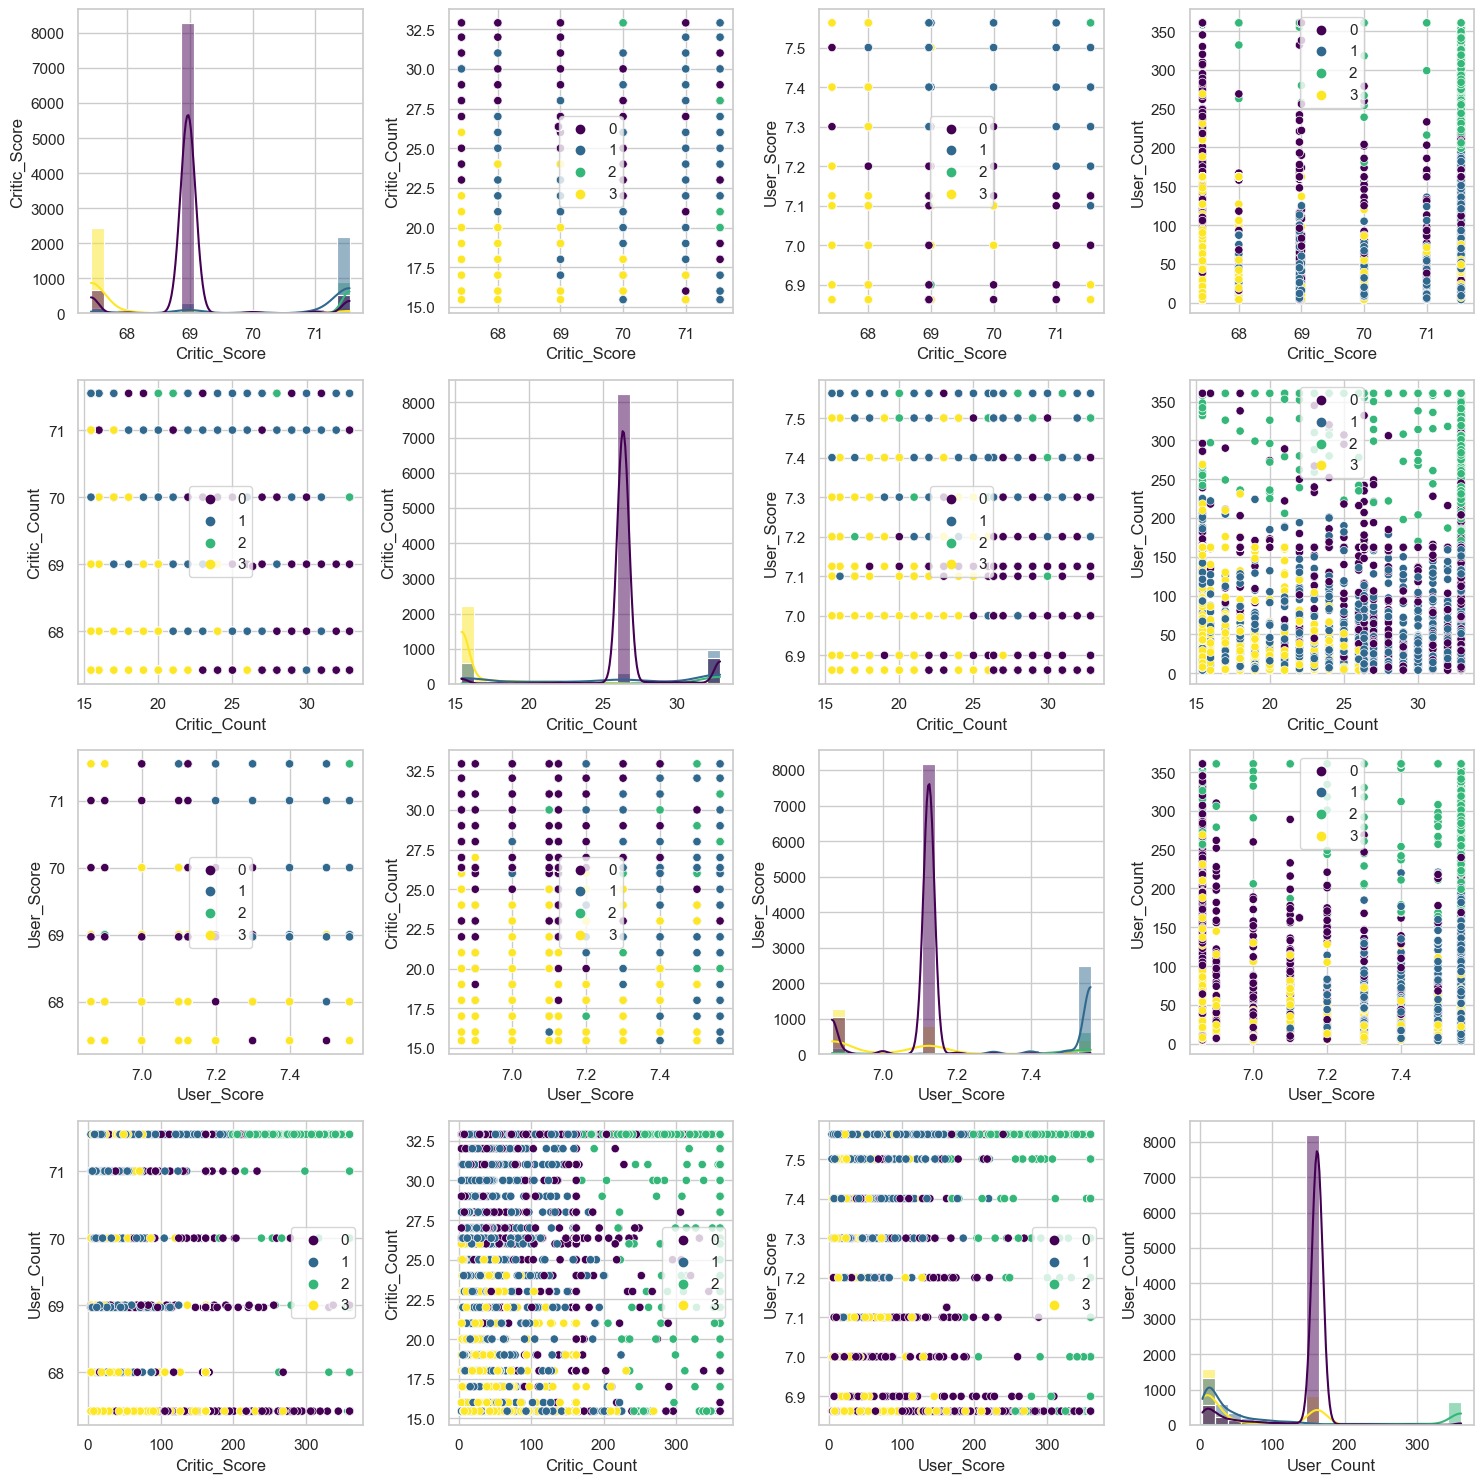

In [28]:
plot_rating.scatterplot()

In [29]:
# define a function to do external evaluation
def external_eval(true_labels, c_labels, Variable):
    v_measure = v_measure_score(true_labels, c_labels)
    rand_index = adjusted_rand_score(true_labels, c_labels)
    mi_score = adjusted_mutual_info_score(true_labels, c_labels)
    
    results = {
        'Variable': Variable,
        'V-measure': v_measure, 
        'Rand Index': rand_index, 
        'Mutual Information': mi_score
    }
    
    return results

In [30]:
# define a function to do internal evaluation
def internal_eval(X, c_labels, Variable):
    db_score = davies_bouldin_score(X, c_labels)
    s_score = silhouette_score(X, c_labels)
    c_score = calinski_harabasz_score(X, c_labels)
    
    results = {
        'Variable': Variable,
        'Davies-Bouldin': db_score, 
        'Silhouette': s_score, 
        'Calinski Harabasz': c_score
    }
        
    return results

In [31]:
# evaluation
X_data = [X_scaled_rating]
true_labels = [y_rating]
cluster_labels = [rating_labels]
variables = ['Rating']

int_evaluation, ext_evaluation = [], []

for X, true, clus, var in zip(X_data, true_labels, cluster_labels, variables):
    ext_evaluation.append(external_eval(true, clus, var))
    int_evaluation.append(internal_eval(X, clus, var))

ext_evaluation_df = pd.DataFrame(ext_evaluation).sort_values(by='Variable', ascending=False)
int_evaluation_df = pd.DataFrame(int_evaluation).sort_values(by='Variable', ascending=False)

In [32]:
ext_evaluation_df

,Variable,V-measure,Rand Index,Mutual Information
0,Rating,0.145998,0.313287,0.145776


In [33]:
int_evaluation_df

,Variable,Davies-Bouldin,Silhouette,Calinski Harabasz
0,Rating,0.917646,0.566165,7566.171445


#### Using Rating - DBSCAN

In [34]:
best_score = -1
best_eps = 0
best_min_samples = 0

for eps in [0.1, 0.5, 1.0, 1.5]:  # range of values for eps
    for min_samples in [2, 3, 4, 5]:  # range of values for min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled_rating)
        
        # if more than one cluster is formed
        if len(np.unique(labels)) > 1:
            silhouette = silhouette_score(X_scaled_rating, labels)
            
            # pick best performance score
            if silhouette > best_score:
                best_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

print("Best parameters from search:")
print(f"eps: {best_eps}, min_samples: {best_min_samples}")
print(f"Silhouette score: {best_score}")

Best parameters from search:
eps: 0.1, min_samples: 2
Silhouette score: 0.5648485746615652


In [48]:
def db_clustering(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    
    return labels, dbscan.components_

In [36]:
c_labels, c_points = db_clustering(X_scaled_rating, eps=0.1, min_samples=2)

In [37]:
plot_rating = plotGrid(data=data_feat, feat=X_rating.columns, labels=c_labels)

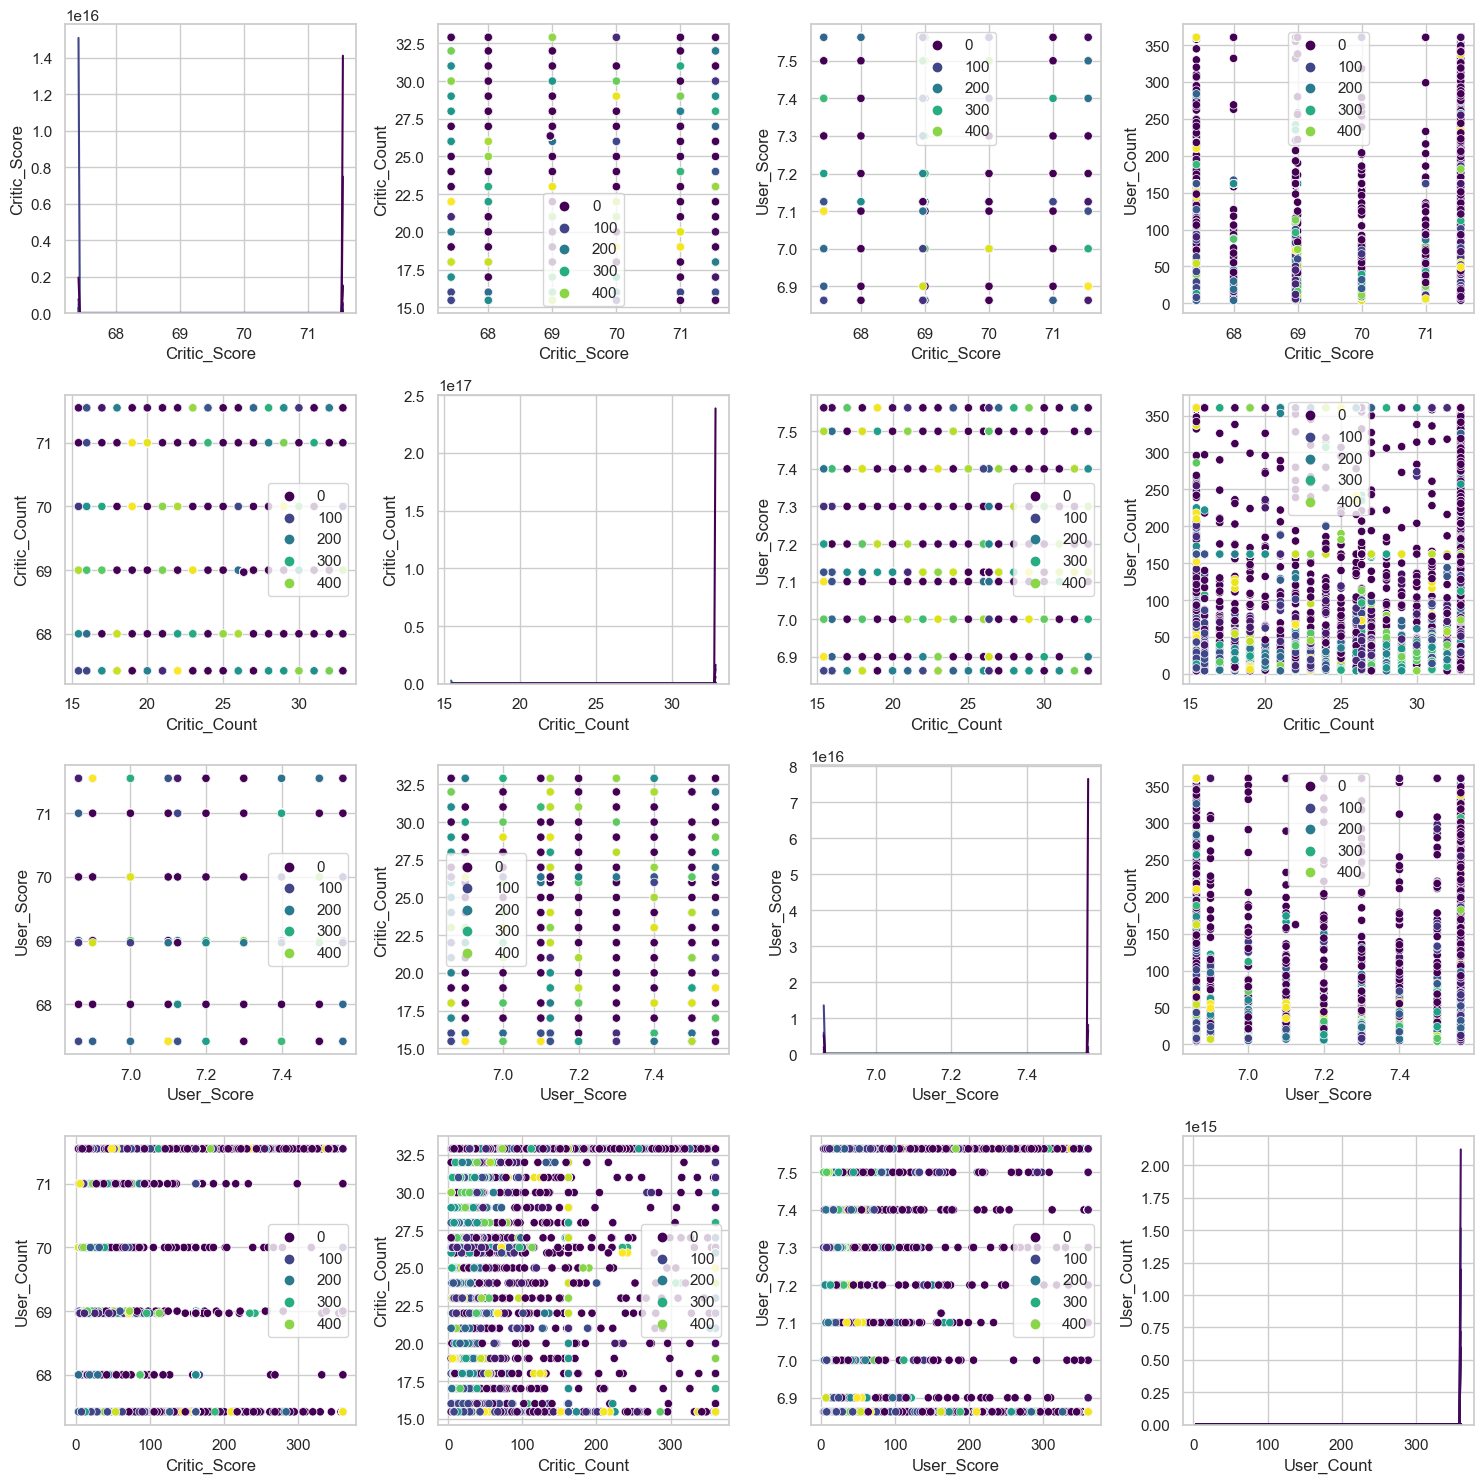

In [38]:
plot_rating.scatterplot()

In [39]:
# evaluation
X_data = [X_scaled_rating]
true_labels = [y_rating]
cluster_labels = [c_labels]
variables = ['Rating']

int_evaluation, ext_evaluation = [], []

for X, true, clus, var in zip(X_data, true_labels, cluster_labels, variables):
    ext_evaluation.append(external_eval(true, clus, var))
    int_evaluation.append(internal_eval(X, clus, var))

ext_evaluation_df = pd.DataFrame(ext_evaluation).sort_values(by='Variable', ascending=False)
int_evaluation_df = pd.DataFrame(int_evaluation).sort_values(by='Variable', ascending=False)

In [40]:
ext_evaluation_df

,Variable,V-measure,Rand Index,Mutual Information
0,Rating,0.168597,0.412227,0.149547


In [41]:
int_evaluation_df

,Variable,Davies-Bouldin,Silhouette,Calinski Harabasz
0,Rating,1.086545,0.564849,226.502357
